# Introduction to Convolutional Neural Networks (CNNs)
A convolutional neural network is a network that is able to take an input image, assign weights and biases to it and learn the patterns in the image in order to classify the type of image against other images.

A typical convolutional neural network can be represented as so:
![Picture of CNN](https://miro.medium.com/max/3744/1*SGPGG7oeSvVlV5sOSQ2iZw.png)

As stated in the presentation, we will using strides, padding and kernel sizes in order to effectively look at the different images and differentiate them from one another.

In this notebook, we will be differentiating images from the CIFAR10 dataset, a dataset that contains different classes of everyday objects seperated into ten classes. Your job is to create a CNN to differentiate these images.

CIFAR10 looks like so:
![CIFAR10 pic](https://miro.medium.com/max/964/1*syyml8q8s1Yt-iEea5m1Ag.png)

Note: Try differentiating images from CoMNIST in future.

## Step 1
We need to preprocess these images to make them compatible with our CNN and we would also need to look at the images to see any changes to be made. Let's do it!

In [0]:
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
from keras.datasets import cifar10
import numpy as np
import random

In [0]:
#@title 
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import random

In [0]:

# This method is a helper method to visualize the images
def visualize_cifar(train_data):
  """ Visualizes the cifar-10 dataset using matplotlib. This helps give a greater understanding
      of the items that are in the dataset"""
  plt.figure(figsize=(7, 7))
  for i in range(1, 10):
    plt.subplot(3, 3, i)
    plt.imshow(random.choice(train_data))

In [0]:
'''
Now, we are going to grab the data.
To do this, use the datasets module of the deep learning library we imported.
This is done like calling a method on a module (random.randint)
but instead it will random.datasets
Once you have the datasets module, you can use the #cifar10.load_data method to get the training and testing data.
'''
(x_train, y_train), (x_test, y_test) = [[0, 0], [0, 0]]

In [0]:
#@title
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 3s 0us/step


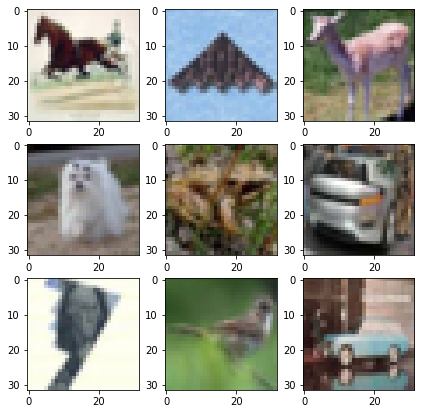

In [0]:
'''
Now we can use any of the training or testing datasets as a visualization tool
This will display random images!
'''
visualize_cifar(x_train)

In [0]:
'''
Now, print the shape of the x_train and y_train lists to see the size of the data we are dealing with
This is commonly done using the shape attribute
'''
print(x_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000, 1)


## What is a convolution?
Convolutional neural networks use convolutions in order to scale across the image and detect patterns in the image. As we showed previously, simple arrays can be used to detect horizontal, diagonal and vertical lines in the image. 

In convolutions, a greater weight indicates a high probability of a pattern detection. Using the dot product, we can explore the effects of stride and filter length on going across an image.

![Different Types of Convolutions](https://aishack.in/static/img/tut/conv-line-detection.jpg)


I am going to create an image with some random noise and demonstrate a convolution dot product with `numpy`. We can explore strides and filters by using this image and the dot product.

For this demonstration, the weights matrix, **w**, will be set to 1's.



[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


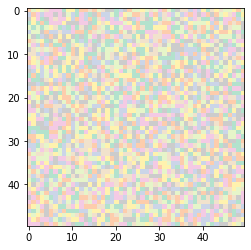

In [0]:
noise = np.random.random((50, 50))
weights = np.ones((3, 3))
print(weights)
plt.imshow(noise, cmap='Pastel2')

In [0]:
first = noise[0:3, 0:3]
print(first)
print()
print(weights)
print()

# do the dot product to get convolution product for filters
print(np.sum(first @ weights))

[[0.16748122 0.56040058 0.72116425]
 [0.35575956 0.1607855  0.44334465]
 [0.94442049 0.6302634  0.44521924]]

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]

13.286516681097925


We can also simulate **max pooling** by computing the max of our filter. Suppose we had a max pooling size of (5, 1). In order to find the most important features, we can use the `max()` function to compute the maximum number in our filter.

In [0]:
filter_list = []
important_features = []

for i in range(5):
  strider = noise[i:3+i, i:3+i]
  filter_list.append(np.sum(strider @ weights))

print(filter_list)
print()
important_features.append( max(filter_list) )
print(important_features)


[13.286516681097925, 8.953551799802177, 8.835072329382585, 10.409319768334369, 15.439077434905627]

[15.439077434905627]


Let's now visualize convolutions and strides using a couple of exercises!

13.286516681097925


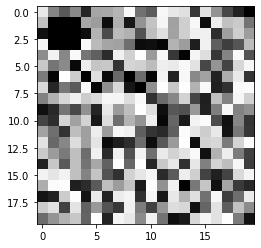

In [0]:
#@title Convolution Experiment
filter_length = 3
filter_width =  3

total_convs = []


nth = noise[:filter_length, :filter_width]
print(np.sum(nth @ weights))


nth = np.ones((filter_length, filter_width))
t = np.copy(noise)

t[1:filter_length + 1, 1:filter_width + 1] = nth
plt.imshow(t[:20, :20], cmap="Greys")

**The black square on the upper left above shows the filter on the image.**

Assignments


1.   Try to change the filter to be a 4 x 4 square by modifying the filter dimensions. Take the dot product of the above code and print it.
2.   Move the current 4 x 4 square by a stride of one and compute the convolution.
3. Move the current square by another stride of three and compute the convolution.
4. Create a `for` loop to loop through the first row of the matrix with a 3 x 3 filter and a stride of 1 to find the first convolution row. Store this row in a list and print it.
5. Why is a larger filter size bad for CNNs?

Double click this text box and place your answer in the *Answer* box below.

Answer:




## CNN Setup

We are going to build the CNN now.

In [0]:
'''
First, we need to encode the train and test answers into a categorical
A categorical is an array that creates an array of zeroes per # of classes in the categorization problem
The program places a one where the class type is. See below for more clarity.
'''
NUM_CLASSES = 10

y_train = keras.utils.to_categorical(y_train, NUM_CLASSES)
y_test = keras.utils.to_categorical(y_test, NUM_CLASSES)

Assignment:
1. Place code above to turn the `x_train` and `y_test` variables to floats. You can do this by using the `astype` method of the vectors above. The argument you put in is `float32` (float with 32-bit precision).
2. Normalize the x_train and x_test vectors by dividing by 255. 

In [0]:
#@title Master
'''
First, we need to encode the train and test answers into a categorical
A categorical is an array that creates an array of zeroes per # of classes in the categorization problem
The program places a one where the class type is. See below for more clarity.
'''
NUM_CLASSES = 10

y_train = keras.utils.to_categorical(y_train, NUM_CLASSES)
y_test = keras.utils.to_categorical(y_test, NUM_CLASSES)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[1:])

(32, 32, 3)


In [0]:
#@title The Neural Network
#@markdown Experiment by changing some of the hyperparameters of the CNN!
regularizer = 0.0063 #@param {type:"slider", min:0.0001, max:0.01, step:0.0001}
filter_amount = 40 #@param {type:"slider", min:16, max:64, step:1}
dropout_ratio = 0.3 #@param {type:"slider", min:0.1, max:0.5, step:0.1}


'''
Time to build the network. MASTER
'''
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.regularizers import l2

model = Sequential()
pool_size = (2, 2)
filter_size = (3, 3)

# Layer 1
model.add(Conv2D(filter_amount, filter_size, padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(filter_amount, filter_size, kernel_regularizer=l2(regularizer)))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(dropout_ratio))

model.add(Conv2D(2 * filter_amount, filter_size, padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(2 * filter_amount, filter_size))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(dropout_ratio))

model.add(Flatten())
model.add(Dense(16 * filter_amount))
model.add(Activation('relu'))
model.add(Dropout(max(2 * dropout_ratio, 0.5)))
model.add(Dense(NUM_CLASSES))
model.add(Activation('softmax'))

model.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 40)        1120      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 40)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 40)        14440     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 40)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 40)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 80)        28880     
_________________________________________________________________
activation_2 (Activation)    (None, 15, 15, 80)       

In [0]:
#@title ConvNet Master
#@markdown Use if you get stuck.

'''
Time to build the network. MASTER
'''
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.regularizers import l2

model = Sequential()
filter_size = (3, 3)
filter_amount = 32
regularizer = 0.01
dropout_ratio = 0.25
pool_size = (2, 2)

# Layer 1
model.add(Conv2D(filter_amount, filter_size, padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(filter_amount, filter_size, kernel_regularizer=l2(regularizer)))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(dropout_ratio))

model.add(Conv2D(2 * filter_amount, filter_size, padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(2 * filter_amount, filter_size))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(dropout_ratio))

model.add(Flatten())
model.add(Dense(16 * filter_amount))
model.add(Activation('relu'))
model.add(Dropout(2 * dropout_ratio))
model.add(Dense(NUM_CLASSES))
model.add(Activation('softmax'))


model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_6 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
activation_7 (Activation)    (None, 15, 15, 64)       

In [0]:
#@title You can set the learning rate here for the optimizer.
learning_rate = 0.008 #@param {type:"slider", min:0.0001, max:0.01, step:0.0001}

model.compile(optimizer=tf.keras.optimizers.SGD(lr=learning_rate, momentum=0.9, 
                                    nesterov = True),
             loss='categorical_crossentropy',
             metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

Now, we can finally train the classifier. Once it evaluates, evaluate it to get your metrics!

In [0]:
history = model.fit(x_train, y_train,
              batch_size=32,
              epochs=100,
              validation_data=(x_test, y_test),
              shuffle=True)

ValueError: ignored

In [0]:
loss, acc, prec, recall = set(model.evaluate(x_test, y_test, verbose=2))
print(f"model, accuracy: {100*acc}")

Optional Assignment:
1. Experiment with the hyperparameters and get the best precision and recall for the classifier!
2. Let us know what metrics you get in the Discord!